In [3]:
using Plotly
using KernelDensity

using Kraft
using Plot

using Information

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7687423554867560430\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11745009209601271238\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7687423554867560430\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling Plot [9db1e993-d40e-4a2c-9c84-e29bd56acb85]
└ @ Base loading.jl:1278


In [4]:
use_style!()

Style with:
  - layout with fields autosize, margin, and template


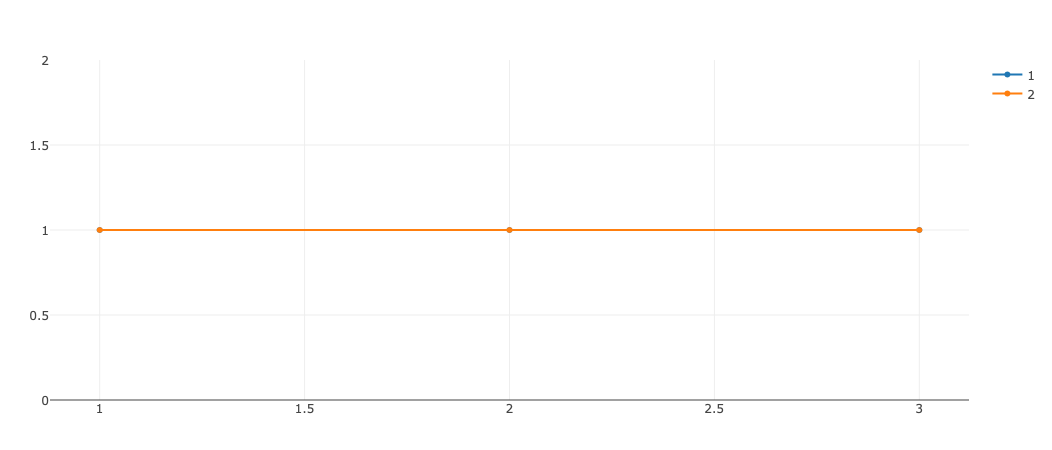

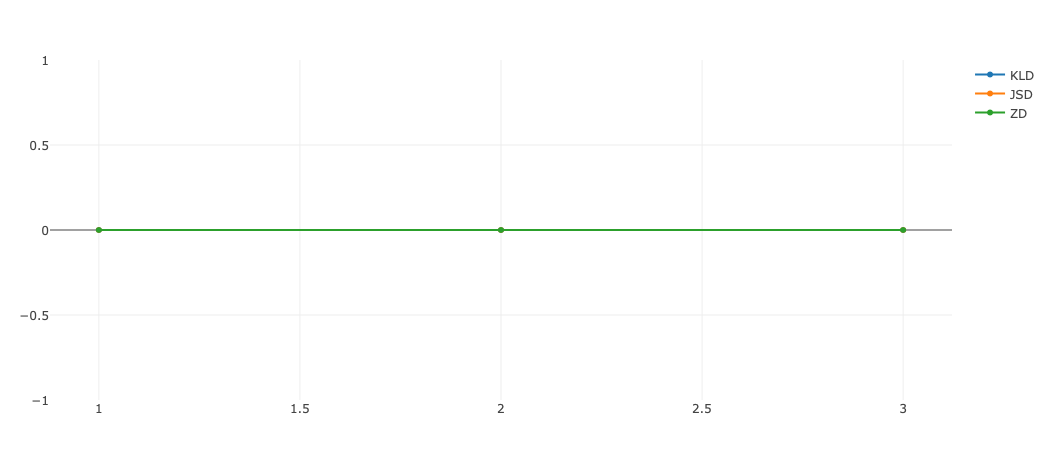

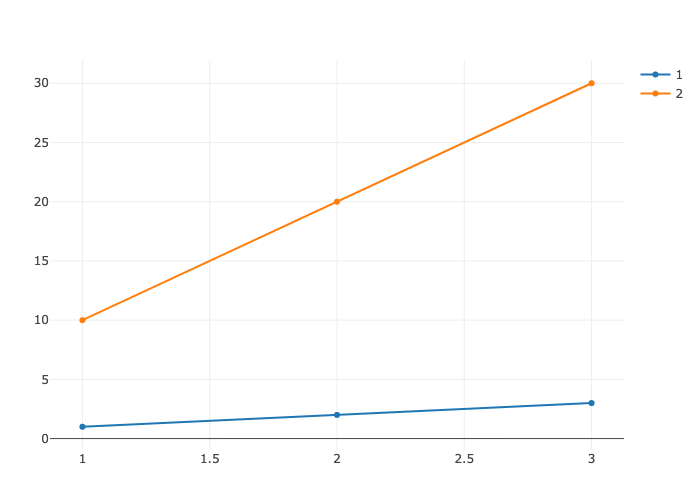

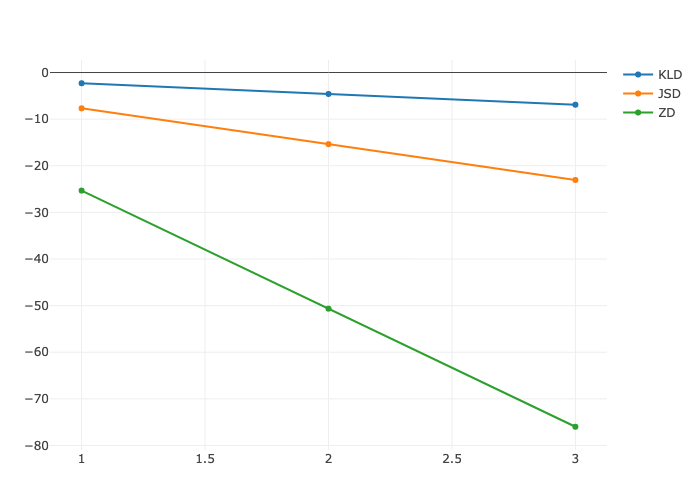

In [5]:
for (v1, v2) in (([1.0, 1.0, 1.0], [1.0, 1.0, 1.0]), ([1.0, 2.0, 3.0], [10.0, 20.0, 30.0]))
    
    display(plot_x_y((v1, v2)))
    
    display(plot_x_y((compute_kld(v1, v2), compute_jsd(v1, v2), compute_zd(v1, v2)); name_ = ("KLD", "JSD", "ZD")))
    
end

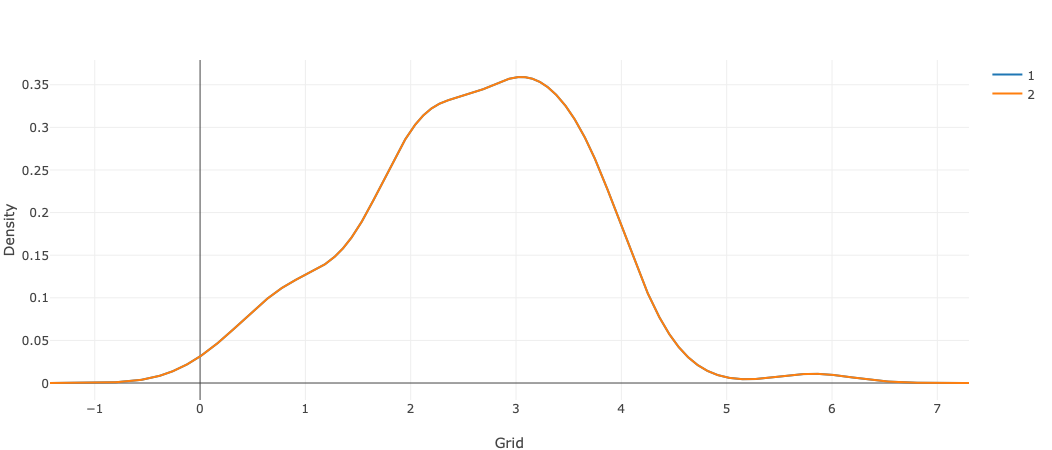

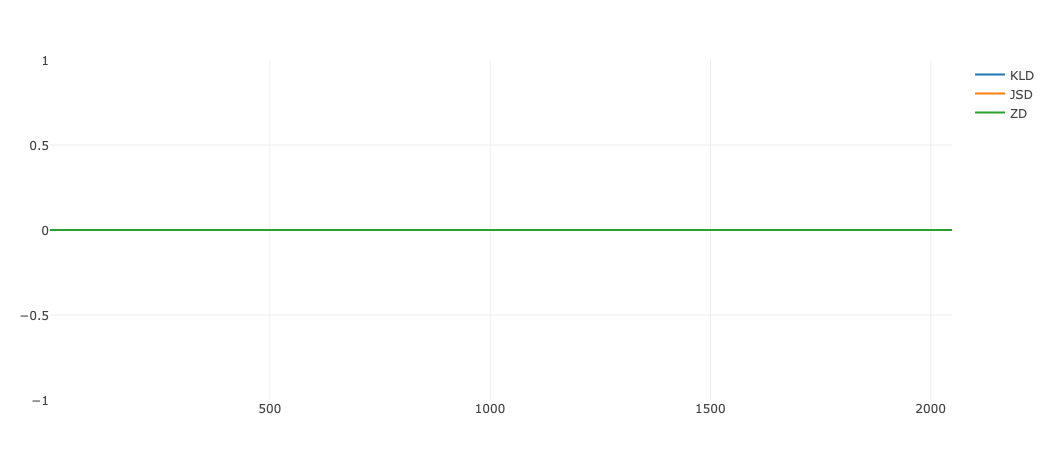

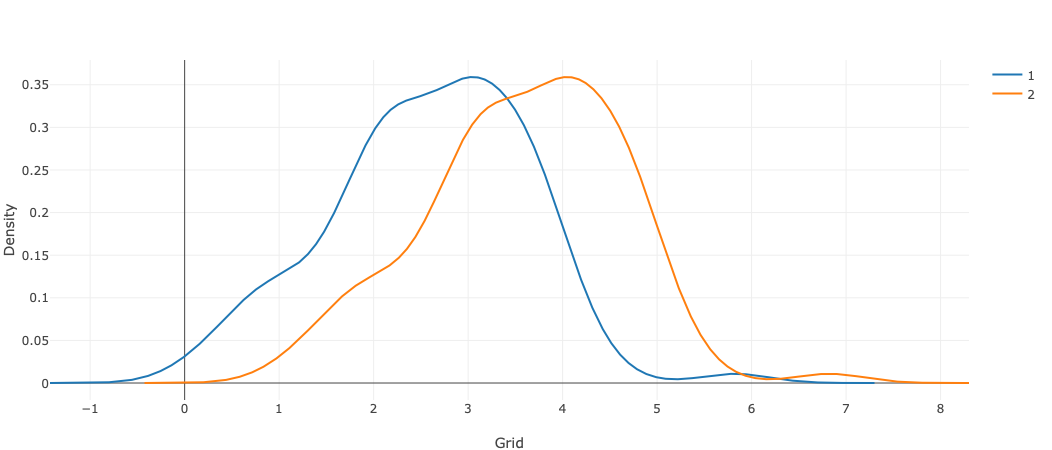

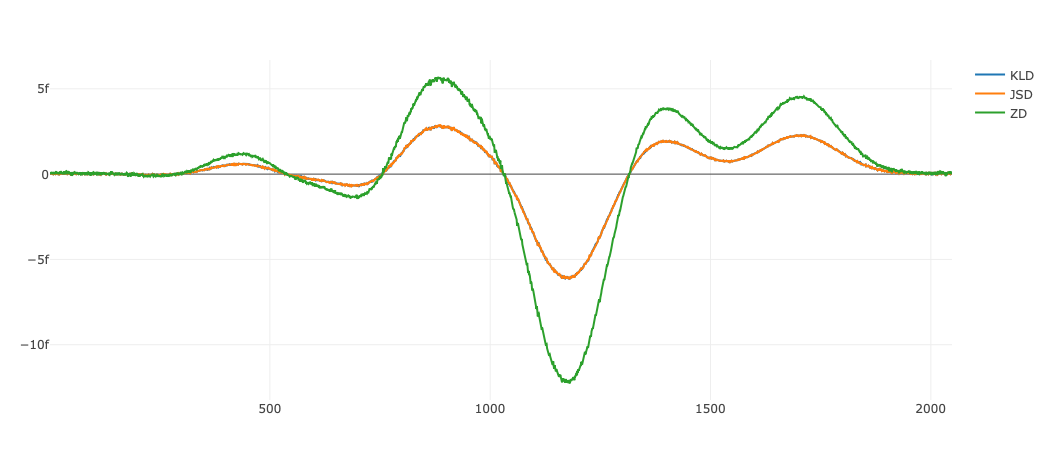

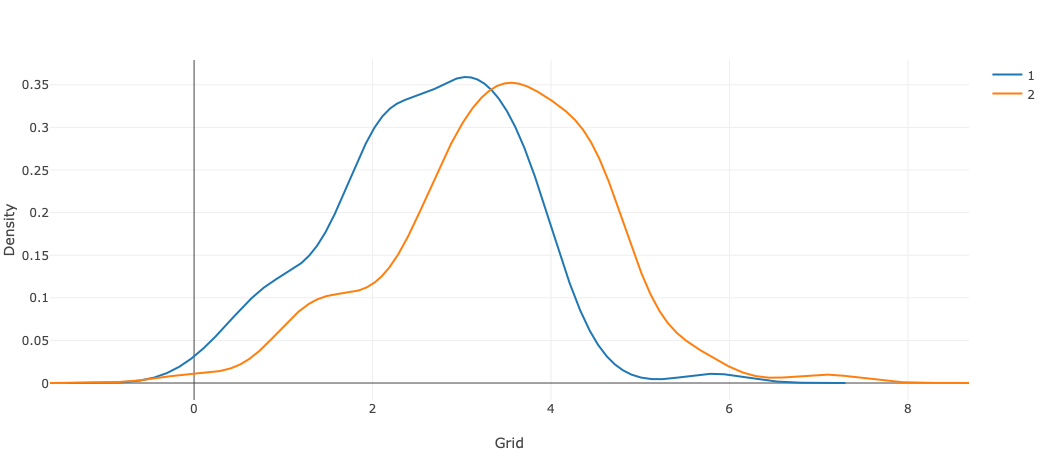

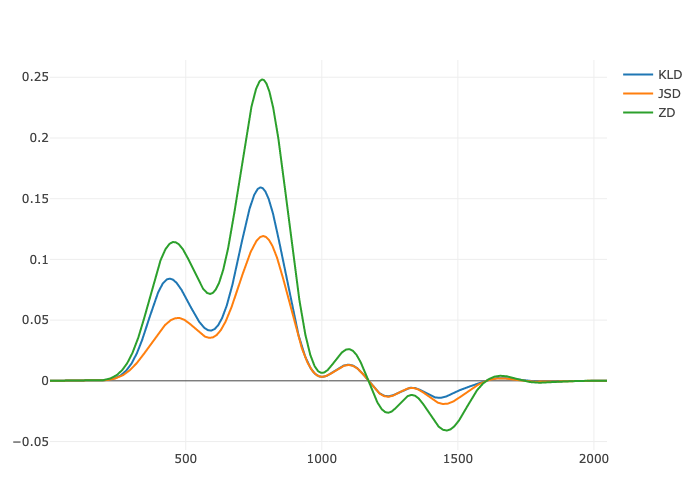

In [6]:
vrandom_1 = shift_minimum(randn(100), "0<")

vrandom_1_shift = vrandom_1 .+ 1

vrandom_2 = shift_minimum(randn(100), "0<")

for (v1, v2) in ((vrandom_1, vrandom_1), (vrandom_1, vrandom_1_shift), (vrandom_1, vrandom_2))
    
    u1 = kde(v1)
    
    y1 = u1.density
    
    u2 = kde(v2)
    
    y2 = u2.density
    
    display(plot_x_y((collect(u1.x), collect(u2.x)), (y1, y2); layout = Layout(xaxis_title = "Grid", yaxis_title = "Density")))
    
    display(plot_x_y((compute_kld(y1, y2), compute_jsd(y1, y2), compute_zd(y1, y2)); name_ = ("KLD", "JSD", "ZD")))
    
end

In [7]:
v1 = collect(0.0:10)

11-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [8]:
v2 = collect(0.0:10:100)

11-element Array{Float64,1}:
   0.0
  10.0
  20.0
  30.0
  40.0
  50.0
  60.0
  70.0
  80.0
  90.0
 100.0

In [9]:
b = kde((v1, v2); npoints = (8, 8))

BivariateKDE{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(-7.391291089171839:3.540368882620525:17.391291089171837, -73.9129108917184:35.40368882620526:173.9129108917184, [6.064522094667683e-7 0.0 … 1.7806081771399898e-6 0.0; 0.0 2.6681358055976772e-5 … 0.0 1.7806081771400008e-6; … ; 1.780608177139972e-6 0.0 … 2.6681358055976772e-5 0.0; 0.0 1.780608177139973e-6 … 0.0 6.064522094668174e-7])

In [10]:
x = collect(b.x)

8-element Array{Float64,1}:
 -7.391291089171839
 -3.8509222065513136
 -0.3105533239307885
  3.2298155586897366
  6.770184441310262
 10.310553323930787
 13.850922206551312
 17.391291089171837

In [11]:
y = collect(b.y)

8-element Array{Float64,1}:
 -73.9129108917184
 -38.509222065513136
  -3.1055332393078805
  32.29815558689738
  67.70184441310263
 103.10553323930789
 138.50922206551314
 173.9129108917184

In [13]:
z = b.density

8×8 Array{Float64,2}:
 6.06452e-7  0.0          0.0          …  1.78061e-6   0.0
 0.0         2.66814e-5   0.000116532     0.0          1.78061e-6
 0.0         0.000116532  0.000609114     0.0          3.68623e-6
 1.46668e-6  5.9355e-5    0.000533644     8.97989e-6   0.0
 0.0         8.97989e-6   0.00011461      5.9355e-5    1.46668e-6
 3.68623e-6  0.0          7.15252e-6   …  0.000116532  0.0
 1.78061e-6  0.0          0.0             2.66814e-5   0.0
 0.0         1.78061e-6   3.68623e-6      0.0          6.06452e-7